In [257]:
#todo 
#tune parameters to the paper - done more or less
# searchgrid over gamma parameters


In [110]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
np.random.seed(0)
from scipy.integrate import odeint


In [288]:
#import data 2012-2019 Italy sentinel
data = pd.read_excel('influenza_it.xlsx')
h1n1 = data['AH1N12009']
h3n2 = data['AH3']
H1N1 = h1n1.to_numpy()
H3N2 = h3n2.to_numpy()
data_n = pd.read_excel('it_non-sen.xlsx')
h1n1_n = data['AH1N12009']
h3n2_n = data['AH3']
H1N1_n = h1n1_n.to_numpy()
H3N2_n = h3n2_n.to_numpy()

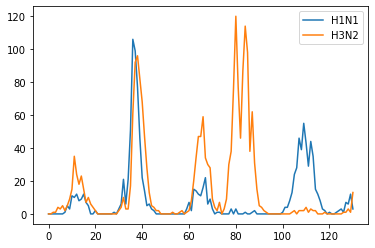

In [291]:
plt.plot(H1N1,label = "H1N1")
plt.plot(H3N2,label = "H3N2")
plt.legend()
plt.show()

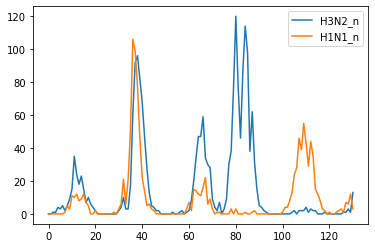

In [295]:
plt.plot(H3N2_n, label = 'H3N2_n')
plt.plot(H1N1_n, label = 'H1N1_n')
plt.legend()
plt.show()

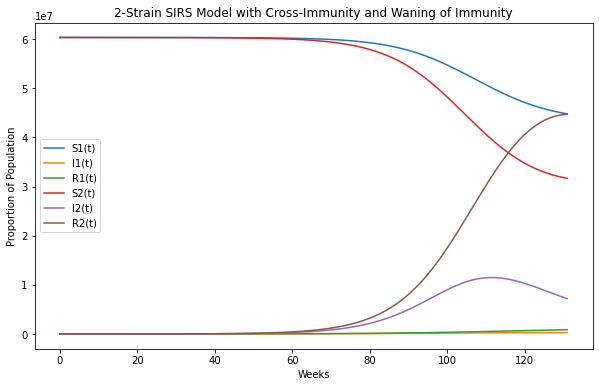

In [256]:
####Final model

# Parameters
N = 60326250  # total population
beta_1 = 0.2  # transmission rate of strain 1
beta_2 = 0.3  # transmission rate of strain 2
D1 = 2.64 #days
D2 = 3.03 #mean infect period
gamma1 = beta_1 /R0_1 # recovery rate should be 1/D1 ???
gamma2 = beta_2 /R0_2
m = np.mean([9.014,8.839,8.597,8.354,8.112,7.869,7.627,7.509,10.045,10.121,10.192,10.262,10.333,10.403,10.474,10.566])
mu = m/1000  # birth rate = death rate (defined as number of births/deaths per 1000 population)
c_12 = 0.4  # cross-immunity from strain 1 to strain 2  c12 
c_21 = 0.17  # cross-immunity from strain 2 to strain 1
#waning rate = 1/L1    
#nu = 0.02  # waning rate of immunity
alpha = 0.1 * N//100000 #0.1 per 100000 - travel parameter

# Initial conditions
I_1 = 100  # initial infected of strain 1
R_1 = 0  # initial recovered of strain 1
I_2 = 50  # initial infected of strain 2
R_2 = 0  # initial recovered of strain 2
S_1 = N - I_1 - I_2  # initial number of susceptible individuals
S_2 = N - I_1 - I_2 

# Simulation time
t_max = 131  # weeks
t = np.linspace(0, t_max, t_max+1)

# Function to calculate the derivatives
def deriv(y, t, N, beta_1, beta_2, gamma, mu, sigma_12, sigma_21, nu):
    S_1, I_1, R_1, S_2, I_2, R_2 = y
    
    dS_1dt = mu*N - c_21*beta_1*S_1*I_1/N - c_21*beta_2*S_1*I_2/N + R_1/L1 - mu*S_1 - alpha 
    dI_1dt = beta_1*S_1*I_1/N  - gamma1*I_1 - mu*I_1 +alpha
    dR_1dt = gamma1*I_1 - nu*R_1 - mu*R_1
    dS_2dt = mu*N - c_12*beta_1*S_2*I_1/N - c_12*beta_2*S_2*I_2/N + R_2/L2 - mu*S_2 - alpha
    dI_2dt = beta_2*S_2*I_2/N  - gamma2*I_2 - mu*I_2 +alpha
    dR_2dt = gamma2*I_2 - nu*R_2 - mu*R_2

    return dS_1dt, dI_1dt, dR_1dt, dS_2dt, dI_2dt, dR_2dt

# Initial conditions vector
y0 = S_1, I_1, R_1, S_2, I_2, R_2

# Integrate the SIRS equations over the time grid, t
ret = odeint(deriv, y0, t, args=(N, beta_1, beta_2, gamma, mu, sigma_12, sigma_21, nu))
S_1, I_1, R_1, S_2, I_2, R_2 = ret.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S_1, label='S1(t)')
plt.plot(t, I_1, label='I1(t)')
plt.plot(t, R_1, label='R1(t)')
plt.plot(t, S_2, label='S2(t)')
plt.plot(t, I_2, label='I2(t)')
plt.plot(t, R_2, label='R2(t)')
plt.xlabel('Weeks')
plt.ylabel('Proportion of Population')
plt.title('2-Strain SIRS Model with Cross-Immunity and Waning of Immunity')
plt.legend()
plt.show()


In [301]:
#add random fluctuations (discovery rate) with p = 0.227 (p(H2N3)=0.193 )
def fluct(I,p):
    for i, k in enumerate(I):
        x = np.random.random()
        if (x < p):
            I[i+1]=I[i]
        else: 
            pass
    return I


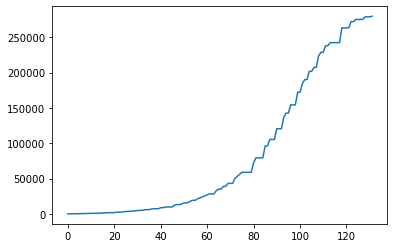

In [302]:
I_fluct = fluct(I_1,0.227)
plt.plot(I_fluct)

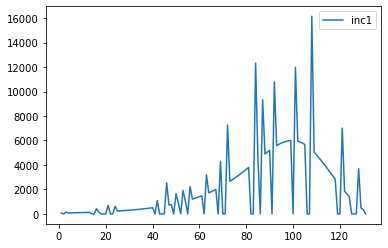

In [278]:
inc1 = np.abs(np.diff(I_1))
inc2 = np.abs(np.diff(I_2))
plt.plot(t[1:],inc1,label = 'inc1')
#plt.plot(t[1:],inc2,label = 'inc2')
#plt.plot(t[1:],binoms,label = 'binoms')
plt.legend()
#plt.ylim(top = np.max(binoms)+1000000)

plt.show()

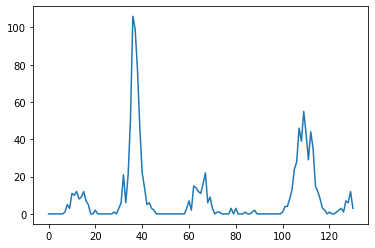

In [282]:
plt.plot(H1N1)

In [304]:
gammas = np.linspace(0.001,0.9,20)
results = []
I1_flucts = []
I2_flucst = []
incids1 = []
incids2 = []
for i,gamma in enumerate(gammas):
    results.append( odeint(deriv, y0, t, args=(N, beta_1, beta_2, gamma, mu, sigma_12, sigma_21, nu)))
    S_1, I_1, R_1, S_2, I_2, R_2 = ret.T
    I1_flucts.append(fluct(I_1,0.227))
    I2_flucts.append(fluct(I_2,0.193))

IndexError: index 132 is out of bounds for axis 0 with size 132

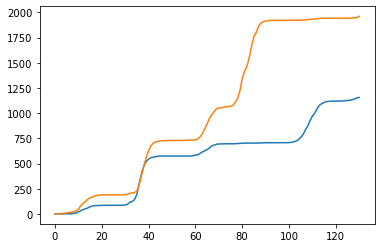

In [286]:
#just cumulative incidence nothing interesting
x = []
y = []
for i in range(0,len(H1N1)):
    x.append(H1N1[i])
    x[i] = x[i-1]+x[i]
    y.append(H3N2[i])
    y[i] = y[i-1]+y[i]
    
plt.plot(x)
plt.plot(y)